## Import libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import pickle

## Load data

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data preprocessing

### Check for missing data

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no missing data

### Check the balance of dataset (regarding Class label)

In [7]:
conditions = [
    df['Class'] == 0,
    df['Class']==1
]

outputs = [
    'Not fraud',
    'Fraud'
]

df['Class_label'] = np.select(conditions, outputs)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Class_label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,Not fraud
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,Not fraud
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,Not fraud
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,Not fraud
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,Not fraud


In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

<AxesSubplot:xlabel='Class_label', ylabel='Count'>

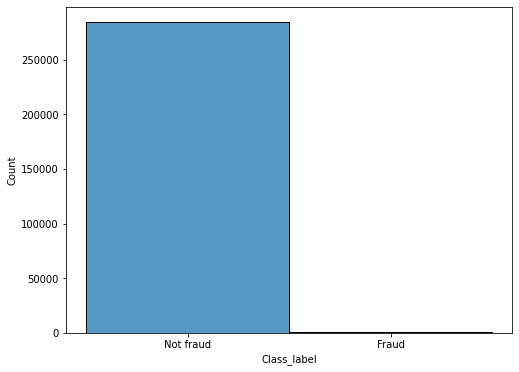

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(df, x='Class_label')

In [11]:
df.drop(columns=['Class_label'], inplace=True)

About 99.83% of data is not fraud and only 0.17% of data is fraud. The dataset is highly unbalanced with respect to target variable **Class**.

### Check feature variable Amount 

In [12]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

<AxesSubplot:xlabel='Amount'>

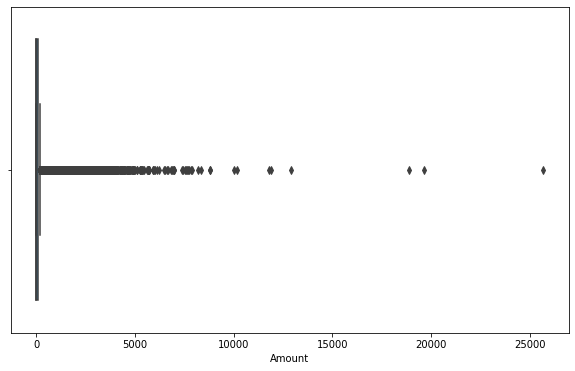

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Amount')

In [14]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
mask = (df['Amount'] < Q1 - 1.5*IQR) | (df['Amount'] > Q3 + 1.5*IQR)
df.loc[mask, :]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
20,16.0,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
64,42.0,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,-0.479813,...,0.172401,1.011543,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,243.66,0
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284735,172727.0,-1.661169,-0.565425,0.294268,-1.549156,-2.301359,2.365956,-0.248881,-0.857361,0.137784,...,1.432397,-0.257828,-0.072471,-1.035804,-0.437889,-0.238543,0.365302,-0.448621,381.05,0
284748,172738.0,1.634178,-0.486939,-1.975967,0.495364,0.263635,-0.713049,0.459925,-0.336879,0.743676,...,-0.113197,-0.493594,0.001993,0.602533,-0.049936,-0.145522,-0.040554,0.024884,220.28,0
284753,172743.0,1.465737,-0.618047,-2.851391,1.425282,0.893893,-0.958325,1.508074,-0.625691,-0.369824,...,0.500426,0.870491,-0.495410,0.676929,0.787688,-0.254918,-0.117200,-0.014737,337.54,0
284757,172745.0,-1.757643,-0.982659,1.091540,-1.409539,-0.662159,0.046930,0.173241,0.364812,1.143381,...,-0.191471,-0.432979,-0.292549,-0.281494,-0.484349,0.366751,-0.102628,-0.458915,200.00,0


There are 31904 outliers for column Amount, hence we can use standard scaler to fix it.

<AxesSubplot:xlabel='Amount'>

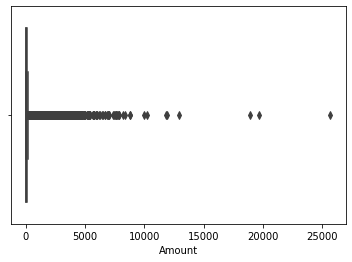

In [15]:
sns.boxplot(data=df, x='Amount')

In [16]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Amount'].describe()

count    2.848070e+05
mean     2.913952e-17
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

### Remove duplicates

In [17]:
df.shape

(284807, 31)

In [18]:
df.drop_duplicates(inplace=True)
df.shape

(283726, 31)

1081 duplicated rows has been dropped

## Train test split

In [19]:
df.drop(columns=['Time'],inplace=True)
X = df.drop(columns=['Class'])
y = df['Class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2022)
X_train.shape, X_test.shape

((212794, 29), (70932, 29))

## Build model

In [35]:
def run_models(X_train, y_train, X_test, y_test):
    output = []
    results = []
    names = []
    models = [
        ('LogReg', LogisticRegression()),
        ('KNN', KNeighborsClassifier()),
        ('GNB', GaussianNB()),
        ('DT', DecisionTreeClassifier()),
        ('RF', RandomForestClassifier(max_depth=4)),
        ('XGB', XGBClassifier(max_depth=4)),
        ('SVM', SVC())
    ]
    metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 
               'f1_weighted', 'roc_auc']
    target_names = ['non-fraud', 'fraud']
    
    for name, model in models:
        kfold = KFold(n_splits=5, shuffle=True, random_state=2022)
        cv_results = cross_validate(model, X_train, y_train, 
                                    cv=kfold, scoring=metrics)
        
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        filename = f'{name}.sav'
        pickle.dump(clf, open(filename, 'wb'))
        
        print(name)
        print(classification_report(y_test, y_pred, 
                                    target_names=target_names))
        
        results.append(cv_results)
        names.append(name)
        
        cv_results_df = pd.DataFrame(cv_results)
        cv_results_df['model'] = name
        output.append(cv_results_df)
        
    final = pd.concat(output, ignore_index=True)
        
    return final

In [36]:
final = run_models(X_train, y_train, X_test, y_test)
final

LogReg
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00     70830
       fraud       0.94      0.67      0.78       102

    accuracy                           1.00     70932
   macro avg       0.97      0.83      0.89     70932
weighted avg       1.00      1.00      1.00     70932

KNN
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00     70830
       fraud       0.91      0.80      0.85       102

    accuracy                           1.00     70932
   macro avg       0.96      0.90      0.93     70932
weighted avg       1.00      1.00      1.00     70932

GNB
              precision    recall  f1-score   support

   non-fraud       1.00      0.98      0.99     70830
       fraud       0.06      0.90      0.11       102

    accuracy                           0.98     70932
   macro avg       0.53      0.94      0.55     70932
weighted avg       1.00      0.98      0.99     70932

DT
 

C:\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:47:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:48:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00     70830
       fraud       0.93      0.86      0.89       102

    accuracy                           1.00     70932
   macro avg       0.96      0.93      0.95     70932
weighted avg       1.00      1.00      1.00     70932

SVM
              precision    recall  f1-score   support

   non-fraud       1.00      1.00      1.00     70830
       fraud       0.93      0.75      0.83       102

    accuracy                           1.00     70932
   macro avg       0.96      0.88      0.92     70932
weighted avg       1.00      1.00      1.00     70932



,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,1.757413,0.055099,0.999013,0.998931,0.999013,0.998915,0.969990,LogReg
1,1.945812,0.043883,0.999107,0.999026,0.999107,0.999028,0.952380,LogReg
2,1.925257,0.053851,0.999154,0.999070,0.999154,0.999084,0.970674,LogReg
3,1.874986,0.084773,0.999107,0.999040,0.999107,0.999008,0.976558,LogReg
4,1.741255,0.069816,0.998919,0.998791,0.998919,0.998793,0.961395,LogReg
5,0.087770,426.923452,0.999389,0.999373,0.999389,0.999343,0.904680,KNN
6,0.142617,336.766809,0.999319,0.999281,0.999319,0.999291,0.910768,KNN
7,0.082758,406.568288,0.999695,0.999687,0.999695,0.999683,0.936416,KNN
8,0.073799,451.546231,0.999436,0.999410,0.999436,0.999408,0.928438,KNN
9,0.079940,387.650332,0.999342,0.999308,0.999342,0.999291,0.871420,KNN


## Evaluate result

In [55]:
def scoring(model_file):
    loaded_model = pickle.load(open(model_file, 'rb'))
    y_pred = loaded_model.predict(X_test)
    print(f'{model_file.split(".")[0]}')
    print(f'Accuracy score = {accuracy_score(y_test, y_pred)}')
    print(f'F1 score = {f1_score(y_test, y_pred)}')
    print(f'Recall score = {recall_score(y_test, y_pred)}\n')
    
model_files = ['LogReg.sav', 'KNN.sav', 'GNB.sav', 'DT.sav', 'RF.sav', 'XGB.sav', 'SVM.sav']

for model in model_files:
    scores = scoring(model)
    
scores

LogReg
Accuracy score = 0.999464275644279
F1 score = 0.7816091954022987
Recall score = 0.6666666666666666

KNN
Accuracy score = 0.9996052557378898
F1 score = 0.8541666666666666
Recall score = 0.803921568627451

GNB
Accuracy score = 0.978542829752439
F1 score = 0.1078546307151231
Recall score = 0.9019607843137255

DT
Accuracy score = 0.9994360796255569
F1 score = 0.8058252427184466
Recall score = 0.8137254901960784

RF
Accuracy score = 0.9995911577285287
F1 score = 0.8449197860962567
Recall score = 0.7745098039215687

XGB
Accuracy score = 0.9997039418034174
F1 score = 0.8934010152284264
Recall score = 0.8627450980392157

SVM
Accuracy score = 0.9995629617098066
F1 score = 0.8324324324324324
Recall score = 0.7549019607843137



- Highest accuracy score: XGB (99.97%)
- Highest F1 score: XGB (89.34%)
- Highest recall score: GNB (90.20%)

###### Best model = XGBoost

#### Check if XGBoost model is overfitting 

In [ ]:
XGB = pickle.load(open('XGB.sav', 'rb'))
XGB_y_pred = XGB.predict(X_test)
confusion_matrix(y_test, XGB_y_pred)

Although the dataset is highly skewed towards non-fraud, there is a high chance that the model will be biased towards non-fraud transactions, but confusion matrix showed that the model is not overfitting as it does not predict every transaction as non-fraud transaction

### Use bootstrapping to analyze models performance metrics, fit time & score time

In [52]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df, id_vars=['model'], var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

# Performance Metrics
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

# Time Metrics
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

### Plot performance metrics

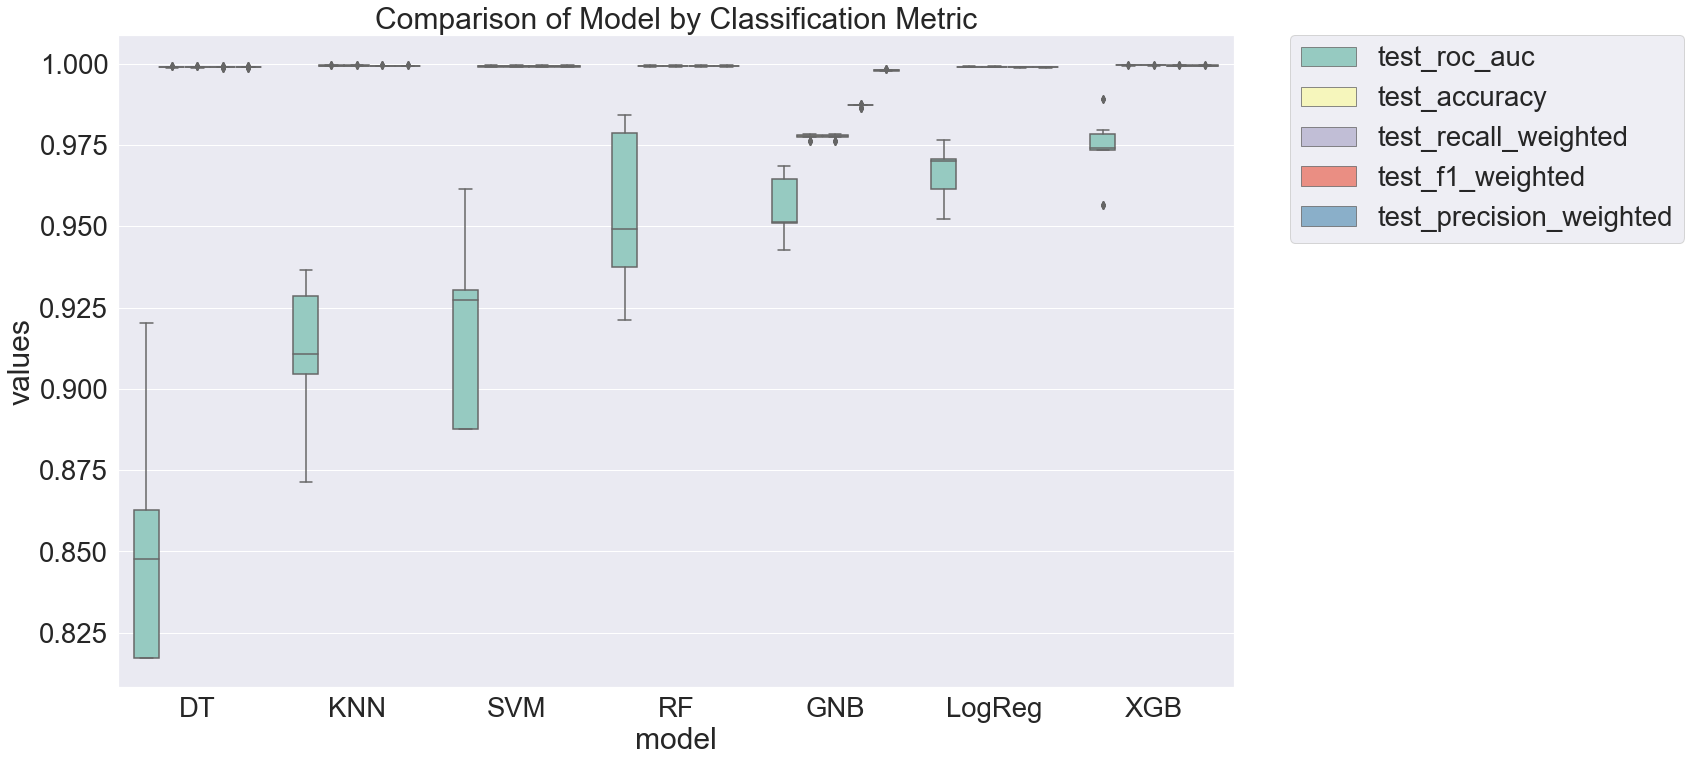

In [53]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

According to roc auc (the higher the score, the better the model is able to distinguish between classes), we can see that XGBoost fit the data best and Decision Tree fit the rather poorly. 

However, although Gaussian Naive Bayes fit the data quite well, but its performance metrics (accuracy, recall, precision, and f1 score) are the lowest amongst all the models.

### Plot training and scoring time

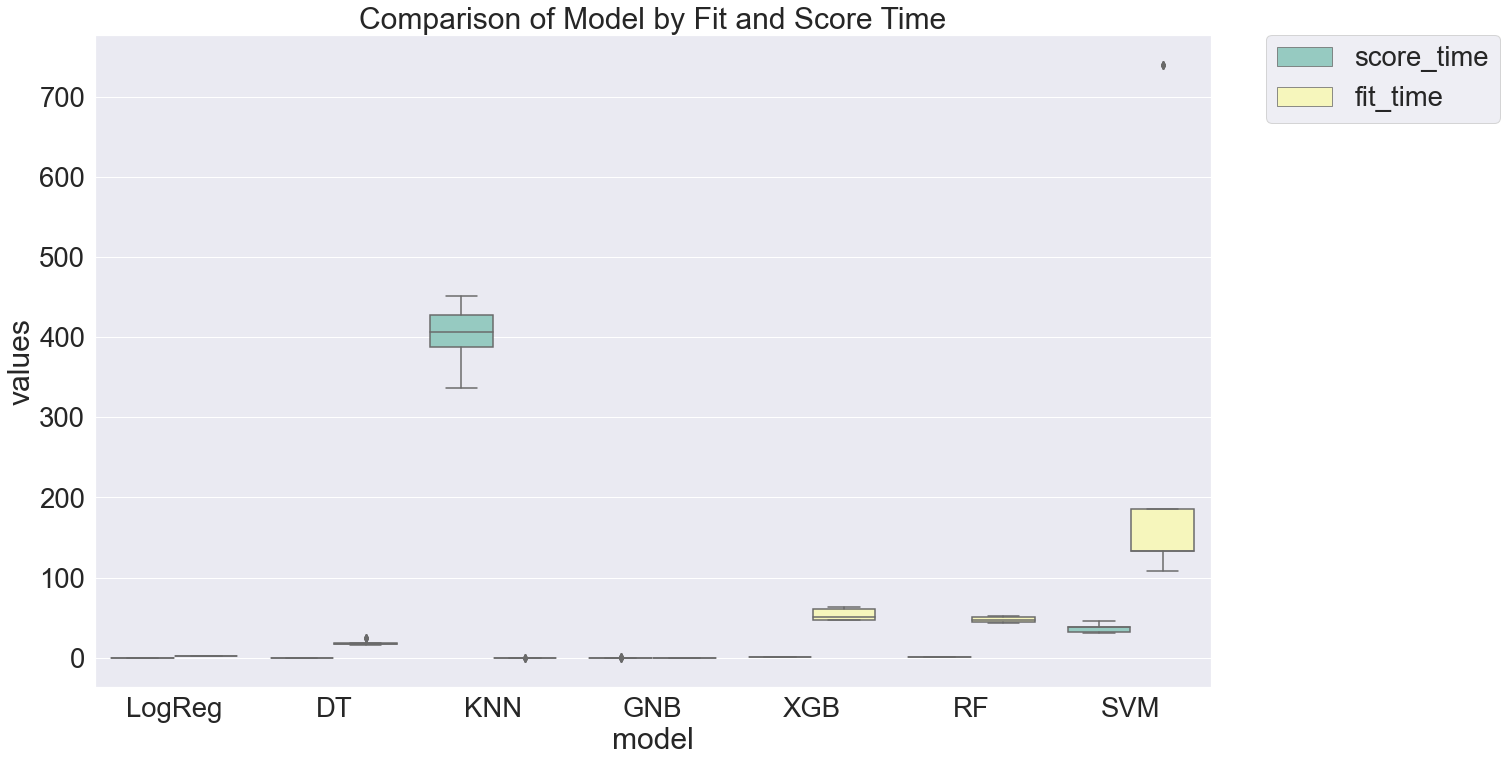

In [54]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

We can see that KNN which has a second-worst performance takes the longest time to predict data, indicating the worst performing and slow to score model.

Same goes to SVM which has the third-worst performance is slow in both training and scoring.

LogReg seems like the best model to choose as it has the second-best performance and has one of the fastest training & scoring time, but it has the lowest recall score which is important for fraud detection

###### Although XGBoost has the best performance, it still takes the second-longest time to fit the data. From here, we can see the trade-off between performance and training time. However, since it has the highest accuracy & f1 score and has the second-highest recall score, it is still the best model to go for.

### Calculate mean & stds for each metric for further analysis

In [45]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_roc_auc           test_accuracy           test_recall_weighted  \
                std      mean           std      mean                  std   
model                                                                        
DT         0.009002  0.853115      0.000051  0.998830             0.000051   
GNB        0.010713  0.955557      0.000835  0.977495             0.000835   
KNN        0.023164  0.905593      0.000153  0.999427             0.000153   
LogReg     0.010844  0.962677      0.000092  0.999079             0.000092   
RF         0.019201  0.970189      0.000154  0.999417             0.000154   
SVM        0.030540  0.933275      0.000175  0.999328             0.000175   
XGB        0.003044  0.977323      0.000129  0.999577             0.000129   

                 test_f1_weighted           test_precision_weighted            
            mean              std      mean                     std      mean  
model                                                                          
DT      0.998830         0.000060  0.998844                0.000076  0.998861  
GNB     0.977495         0.000409  0.987040                0.000294  0.997990  
KNN     0.999427         0.000166  0.999390                0.000163  0.999404  
LogReg  0.999079         0.000113  0.998988                0.000113  0.998991  
RF      0.999417         0.000181  0.999378                0.000159  0.999392  
SVM     0.999328         0.000203  0.999257                0.000194  0.999302  
XGB     0.999577         0.000142  0.999559                0.000135  0.999563

### Calculate mean & stds for training and scoring time for further analysis

In [46]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

fit_time             score_time            
               std        mean        std        mean
model                                                
DT        1.283307   17.036356   0.017161    0.100938
GNB       0.026925    0.167755   0.117658    0.165062
KNN       0.026181    0.096171  37.409311  396.966467
LogReg    0.086265    1.886625   0.017780    0.059241
RF        4.631272   48.931428   0.122156    0.643136
SVM     265.703987  266.098060   5.331171   36.864993
XGB       7.867791   57.522084   0.020756    0.321339

## Conclusion

###### Winner model: XGBoost
- Accuracy score = 99.97%
- F1 score = 89.34%
- Recall score = 86.27%

It is not surprising to obtain 99.97% of accuracy score because of the imbalance of dataset, but we can see that the model is not overfitting based on the confusion matrix. It is best if the dataset provided is the original dataset with the actual features follow a similar pattern as the transformed PCA features.

##### Advantage of XGBoost
- Regularization - Standard GBM has no regularization like XGBoost which is known as a 'regularized boosting' technique that helps reduce overfitting
- Parallel Processing - performs faster than standard GBM
c) High Flexibility - custom optimization objectives and evaluation criteria
- Handle Missing Value - XGBoost has an in-built routine that handle missing values
- Tree Pruning - standard GBM would stop splitting a node when it obtain a negative loss in the split, whereas XGBoost will go deeper or up to the max_depth specified, then start pruning the tree backwards and remove splits which has no positive gain
- Cross Validation - in-built cross validation at each iteration

##### Future improvement: Hyperparameter tuning 
- General parameters: booster, silent, nthread
- Booster parameters: eta (learning rate), min_child_weight, max_depth, max_leaf_nodes, gamma, max_delta_step, lambda, alpha
- Learning task parameters: objective, eval_metric

##### General approach for parameter tuning
- Set the default learning rate (0.1) & parameters and determine the optimum number of trees for this learning rate using cross validation
- Tune tree-specific parameters (max_depth, min_child_weight, gamma, etc.)
- Tune regularization parameters (lambda & alpha)
- Lower learning rate and decide the optimal parameters

###### Reference
Aarshay. (2016, March 1). Complete Guide to Parameter Tuning in XGBoost with codes in Python. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/